**Кратий план работы:**

Исследовательский анализ образовательной онлайн школы:

**1.** Создание SQL - запроса.
- загрузка библиотек;
- написать SQL - запрос.
  
**2.** Обработка на python:
- подготовка данных:
- анализ природы пропусков и их разумная обработка;
- обработка пропусков и типов данных;
- создать столбец с количеством открытых месяцев у студента;
- поделить студентов на волны и добавь данные в новый столбец.

**3.** Создать дашборд в DataLens.


**4.** Сформировать выводы на основе полученных данных и дать рекомендации платформе.

**Цель исследования:** Определить ключевые характеристики и предпочтения студентов, использующих образовательную платформу для подготовки к ЕГЭ и ОГЭ, с целью оптимизации продуктовой, маркетинговой стратегий для увеличения вовлеченности и удержания.

In [1]:
# Импорт библиотек
import pandas as pd
import duckdb
import matplotlib.pyplot as plt
import seaborn as sns

# Шаг №1: SQL - Запрос

In [2]:
# Импорт таблиц из google sheets:
url = 'https://drive.google.com/file/d/1PPSZJYzbtJgx9pF-WF7XhIJR7Hwxq1bz/view?usp=drive_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
users = pd.read_csv(path)

url1 = 'https://drive.google.com/file/d/17IrbKgpv_J0gbWeJzG4svy3uvlKyhHaY/view?usp=drive_link'
path1 = 'https://drive.google.com/uc?export=download&id='+url1.split('/')[-2]
course_users = pd.read_csv(path1)

url2 = 'https://drive.google.com/file/d/1bS-c08EX2oJJ0hKD_kF2zoyPUUknkfln/view?usp=drive_link'
path2 = 'https://drive.google.com/uc?export=download&id='+url2.split('/')[-2]
courses = pd.read_csv(path2)

url3 = 'https://drive.google.com/file/d/1CDVv8Bsy4RQS8lj8zUJDLbf6C80raq4L/view?usp=drive_link'
path3 = 'https://drive.google.com/uc?export=download&id='+url3.split('/')[-2]
course_types = pd.read_csv(path3)

url4 = 'https://drive.google.com/file/d/1S_EM3xSfIrb7w1k514rpmf69kwENLyIY/view?usp=drive_link'
path4 = 'https://drive.google.com/uc?export=download&id='+url4.split('/')[-2]
lessons = pd.read_csv(path4)

url5 = 'https://drive.google.com/file/d/1h4FzBFggtCyhm52DeNb5IZ80sbjU9C8r/view?usp=drive_link'
path5 = 'https://drive.google.com/uc?export=download&id='+url5.split('/')[-2]
subjects = pd.read_csv(path5)

url6 = 'https://drive.google.com/file/d/13sB_Mk-Wt1KycwVZD16NO4wjyhybYZGC/view?usp=drive_link'
path6 = 'https://drive.google.com/uc?export=download&id='+url6.split('/')[-2]
cities = pd.read_csv(path6)

url7 = 'https://drive.google.com/file/d/14PVGQT7LnuqqEUSNatvvQD8S9LA22yJD/view?usp=drive_link'
path7 = 'https://drive.google.com/uc?export=download&id='+url7.split('/')[-2]
homework_done = pd.read_csv(path7)

url8 = 'https://drive.google.com/file/d/1EvReaMBQIt1JyvzwsSAx8_k2WTYIe9Ym/view?usp=drive_link'
path8 = 'https://drive.google.com/uc?export=download&id='+url8.split('/')[-2]
homework = pd.read_csv(path8)

url9 = 'https://drive.google.com/file/d/1fK835y_tadcDxBhn683-z74CRBomp3s1/view?usp=drive_link'
path9 = 'https://drive.google.com/uc?export=download&id='+url9.split('/')[-2]
homework_lessons = pd.read_csv(path9)

url10 = 'https://drive.google.com/file/d/1_AphTMOtYuBa_X3vL4q1ar63ujwtzI9v/view?usp=drive_link'
path10 = 'https://drive.google.com/uc?export=download&id='+url10.split('/')[-2]
user_roles = pd.read_csv(path10)

## Схема ER-диаграмм

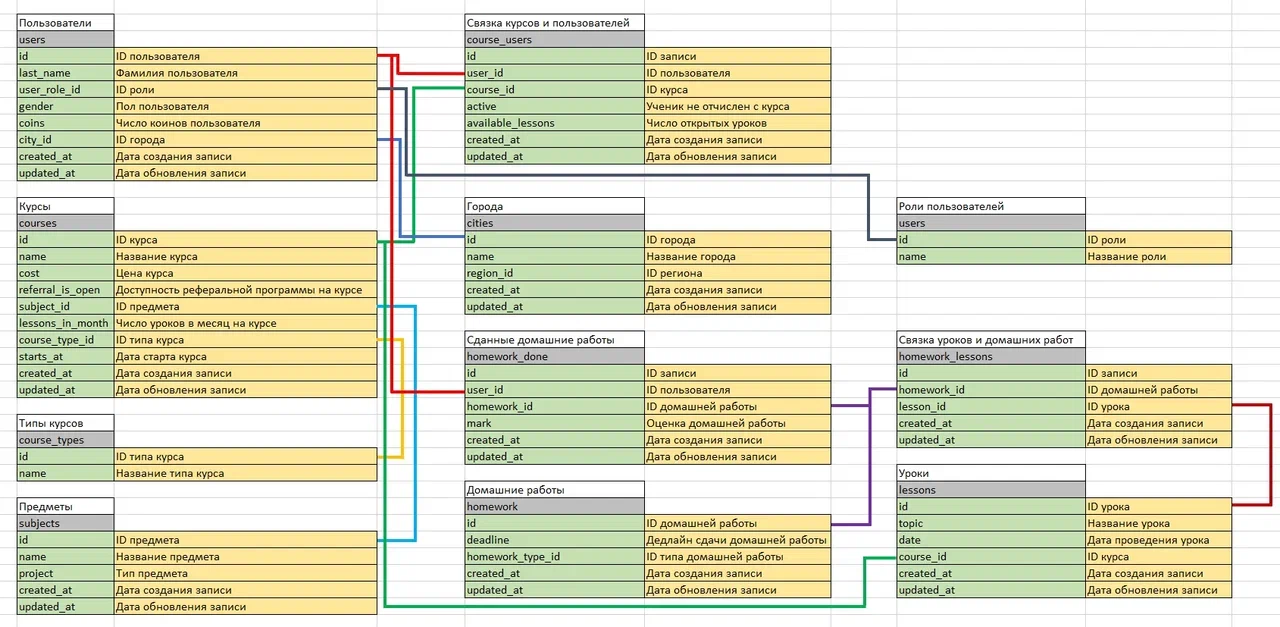

In [3]:
# Создание SQL-запроса
query = """
-- Первый подзапрос отбирает курсы и тип курса

WITH courses_type as (SELECT 
                            c.id as courses_id, 
                            c.name as courses_name,
                            ct.name as course_types_name,
                            c.starts_at as courses_starts,
                            c.subject_id as subject_id
                         FROM courses as c
                            LEFT JOIN course_types as ct
                            ON c.course_type_id = ct.id
                            ),
                            
-- Второй подзапрос присоединил таблицу с предметами

courses_subject as (SELECT 
                           ct.courses_id as courses_id,
                           ct.courses_name as courses_name,
                           s.name as subjects_name,
                           s.project as subject_project,
                           ct.course_types_name as course_types_name,
                           ct.courses_starts as courses_starts
                    FROM
                        courses_type as ct
                        LEFT JOIN subjects as s
                        ON ct.subject_id = s.id
                        ),

-- Третий подзапрос присоединил таблицу с пользователями и городами

courses_users_city as (SELECT 
    cs.courses_id as courses_id,
    cs.courses_name as courses_name,
    cs.subjects_name as subjects_name,
    cs.subject_project as subject_project,
    cs.course_types_name as course_types_name,
    cs.courses_starts as courses_starts,
    u.id as id_users,
    u.last_name as last_name_users,
    c.name as city_name,
    cu.active as course_users_active,
    cu.created_at as course_users_created_at
FROM 
    courses_subject as cs
    LEFT JOIN course_users as cu
    ON cs.courses_id = cu.course_id
    LEFT JOIN users as u
    ON cu.user_id = u.id
    LEFT JOIN cities as c
    ON u.city_id = c.id
    )

-- Четвертым действием добавил таблицу с выполненными домашними заданиями и посчитал количество открытых месяцев и количество сданных дз на курсе

SELECT 
    cuc.courses_id as courses_id,
    cuc.courses_name as courses_name,
    cuc.subjects_name as subjects_name,
    cuc.subject_project as subject_project,
    cuc.course_types_name as course_types_name,
    cuc.courses_starts as courses_starts,
    cuc.id_users as id_users,
    cuc.last_name_users as last_name_users,
    cuc.city_name as city_name,
    cuc.course_users_active as course_users_active,
    cuc.course_users_created_at as course_users_created_at,
    COUNT(EXTRACT(MONTH FROM course_users_created_at::DATE)) as full_months,
    COUNT(hd.mark) as number_of_homework
FROM 
    courses_users_city as cuc
    LEFT JOIN homework_done as hd
    ON cuc.id_users = hd.user_id
GROUP BY 
    courses_id,
    courses_name,
    subjects_name,
    subject_project,
    course_types_name,
    courses_starts,
    id_users,
    last_name_users,
    city_name,
    course_users_active,
    course_users_created_at;

"""

In [4]:
# Выполнение SQL-запроса
df_result = duckdb.query(query).to_df()

# Вывод результата
display(df_result)

,courses_id,courses_name,subjects_name,subject_project,course_types_name,courses_starts,id_users,last_name_users,city_name,course_users_active,course_users_created_at,full_months,number_of_homework
0,101,"Курс ""Кульный"" по итоговому сочинению 2к24 для...",Русский,ЕГЭ,Спецкурс,2024-11-04,10001.0,Markova,Самара,1.0,2024-11-03 14:43:47,22,17
1,19,Годовой 2к25 стандарт,Русский,ЕГЭ,Годовой,2024-09-21,10002.0,Коваленко,Москва,0.0,2024-07-25 18:07:04,5,4
2,35,Крепкий орешек,Химия,ЕГЭ,Спецкурс,2024-06-21,10005.0,Гусев,Белгород,1.0,2024-07-26 05:38:41,2,2
3,23,Годовой 2К25 стандарт с Машей,Математика,ЕГЭ,Годовой,2024-09-20,10011.0,Ищенко,Анива,1.0,2024-09-10 09:14:04,11,10
4,40,НЕдетский курс,Обществознание,ЕГЭ,Спецкурс,2024-08-04,10012.0,Вахрушева,Ижевск,1.0,2024-08-05 12:14:09,19,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15360,47,Скорая помощь по обществознанию 2к24,Обществознание,ЕГЭ,Спецкурс,2024-10-24,33909.0,Шхагошева,Нальчик,1.0,2024-11-05 17:38:53,1,0
15361,101,"Курс ""Кульный"" по итоговому сочинению 2к24 для...",Русский,ЕГЭ,Спецкурс,2024-11-04,33909.0,Шхагошева,Нальчик,1.0,2024-11-05 17:40:54,1,0
15362,70,Мини-курс по скорочтению,Литература,ЕГЭ,Спецкурс,2024-09-17,33958.0,Дмитрий,None,1.0,2024-10-11 17:08:58,1,0
15363,64,Годовой 2к25 платинум,Биология,ЕГЭ,Годовой,2024-09-17,NaN,None,None,NaN,None,0,0


# Шаг № 2: Обработка на python

Данные:
- courses_id: ID курса
- courses_name: Название курса
- subjects_name: Предмет
- subject_project: Тип предмета
- course_types_name: Тип курса 
- courses_starts: Дата старта курса
- id_users: ID ученика
- last_name_users: Фамилия ученика
- city_name: Город ученика
- course_users_active: Ученик не отчислен с курса
- course_users_created_at: Дата открытия курса ученику
- full_months: Сколько полных месяцев курса открыто у ученика
- number_of_homework: Число сданных ДЗ ученика на курсе

In [5]:
# Функция для просмотра информации о DataFrame
def info_data_frame (x):
    return  display(
        print('------Информация о DataFrame------\n'),
        x.info(),
        '-'* 25,           
        'Вывод первых 5 строчек:', x.head(),           
        f'Число строк : {x.shape[0]}',
        '-'* 25,
        f'Число столбцов : {x.shape[1]}',
        '-'* 25,
        f'Количество дубликатов = {x.duplicated().sum()}',
        '-'* 25,
        'Пропущенные значения:',  x.isna().sum(),
        '-'* 25,            
        'Процент пропусков от всего DataFrame:',
         (x.isna().mean().sort_values(ascending=False)*100).round(2).astype(str) + '%'
        )   

In [6]:
# Просмотр общей информации
info_data_frame (df_result)

------Информация о DataFrame------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15365 entries, 0 to 15364
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   courses_id               15365 non-null  int64  
 1   courses_name             15365 non-null  object 
 2   subjects_name            15365 non-null  object 
 3   subject_project          15365 non-null  object 
 4   course_types_name        15365 non-null  object 
 5   courses_starts           15365 non-null  object 
 6   id_users                 15347 non-null  float64
 7   last_name_users          15347 non-null  object 
 8   city_name                14373 non-null  object 
 9   course_users_active      15347 non-null  float64
 10  course_users_created_at  15347 non-null  object 
 11  full_months              15365 non-null  int64  
 12  number_of_homework       15365 non-null  int64  
dtypes: float64(2), int64(3), object(8)
memor

None

None

'-------------------------'

'Вывод первых 5 строчек:'

,courses_id,courses_name,subjects_name,subject_project,course_types_name,courses_starts,id_users,last_name_users,city_name,course_users_active,course_users_created_at,full_months,number_of_homework
0,101,"Курс ""Кульный"" по итоговому сочинению 2к24 для...",Русский,ЕГЭ,Спецкурс,2024-11-04,10001.0,Markova,Самара,1.0,2024-11-03 14:43:47,22,17
1,19,Годовой 2к25 стандарт,Русский,ЕГЭ,Годовой,2024-09-21,10002.0,Коваленко,Москва,0.0,2024-07-25 18:07:04,5,4
2,35,Крепкий орешек,Химия,ЕГЭ,Спецкурс,2024-06-21,10005.0,Гусев,Белгород,1.0,2024-07-26 05:38:41,2,2
3,23,Годовой 2К25 стандарт с Машей,Математика,ЕГЭ,Годовой,2024-09-20,10011.0,Ищенко,Анива,1.0,2024-09-10 09:14:04,11,10
4,40,НЕдетский курс,Обществознание,ЕГЭ,Спецкурс,2024-08-04,10012.0,Вахрушева,Ижевск,1.0,2024-08-05 12:14:09,19,17


'Число строк : 15365'

'-------------------------'

'Число столбцов : 13'

'-------------------------'

'Количество дубликатов = 0'

'-------------------------'

'Пропущенные значения:'

courses_id                   0
courses_name                 0
subjects_name                0
subject_project              0
course_types_name            0
courses_starts               0
id_users                    18
last_name_users             18
city_name                  992
course_users_active         18
course_users_created_at     18
full_months                  0
number_of_homework           0
dtype: int64

'-------------------------'

'Процент пропусков от всего DataFrame:'

city_name                  6.46%
course_users_active        0.12%
last_name_users            0.12%
id_users                   0.12%
course_users_created_at    0.12%
course_types_name           0.0%
subject_project             0.0%
subjects_name               0.0%
courses_name                0.0%
courses_id                  0.0%
courses_starts              0.0%
full_months                 0.0%
number_of_homework          0.0%
dtype: object

In [7]:
#Удаление пропущенных значений 
df_result.dropna(subset = ['id_users'], inplace=True)

In [8]:
# Замена пропусков в столбце city_name
df_result['city_name'] = df_result['city_name'].fillna('unknow')

<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">
    
- Малый процент пропусков в столбцах course_users_active, last_name_users, id_users, course_users_created_at - 0.12%, можно удалить, это не повлияет на конечный результат.
- В столбце `city_name` заменил пропуски на значение unknow.   
</div>

In [9]:
# Столбец "ID курса" привел к целочисленному
df_result['courses_id'] = df_result['courses_id'].astype(int)

In [10]:
# Столбец "ID ученика" привел к целочисленному
df_result['id_users'] = df_result['id_users'].astype(int)

In [11]:
# Столбец "Ученик не отчислен с курса" привел к целочисленному
df_result['course_users_active'] = df_result['course_users_active'].astype(int)

In [12]:
# Столбец Дата старта курса привел к datetime
df_result['courses_starts'] = pd.to_datetime(df_result['courses_starts'])

In [13]:
# Столбец "Дата открытия курса ученику" привел к datetime
df_result['course_users_created_at'] = pd.to_datetime(df_result['course_users_created_at'])

In [14]:
# Проверил
info_data_frame (df_result)

------Информация о DataFrame------

<class 'pandas.core.frame.DataFrame'>
Index: 15347 entries, 0 to 15362
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   courses_id               15347 non-null  int64         
 1   courses_name             15347 non-null  object        
 2   subjects_name            15347 non-null  object        
 3   subject_project          15347 non-null  object        
 4   course_types_name        15347 non-null  object        
 5   courses_starts           15347 non-null  datetime64[ns]
 6   id_users                 15347 non-null  int64         
 7   last_name_users          15347 non-null  object        
 8   city_name                15347 non-null  object        
 9   course_users_active      15347 non-null  int64         
 10  course_users_created_at  15347 non-null  datetime64[ns]
 11  full_months              15347 non-null  int64         
 12  n

None

None

'-------------------------'

'Вывод первых 5 строчек:'

,courses_id,courses_name,subjects_name,subject_project,course_types_name,courses_starts,id_users,last_name_users,city_name,course_users_active,course_users_created_at,full_months,number_of_homework
0,101,"Курс ""Кульный"" по итоговому сочинению 2к24 для...",Русский,ЕГЭ,Спецкурс,2024-11-04,10001,Markova,Самара,1,2024-11-03 14:43:47,22,17
1,19,Годовой 2к25 стандарт,Русский,ЕГЭ,Годовой,2024-09-21,10002,Коваленко,Москва,0,2024-07-25 18:07:04,5,4
2,35,Крепкий орешек,Химия,ЕГЭ,Спецкурс,2024-06-21,10005,Гусев,Белгород,1,2024-07-26 05:38:41,2,2
3,23,Годовой 2К25 стандарт с Машей,Математика,ЕГЭ,Годовой,2024-09-20,10011,Ищенко,Анива,1,2024-09-10 09:14:04,11,10
4,40,НЕдетский курс,Обществознание,ЕГЭ,Спецкурс,2024-08-04,10012,Вахрушева,Ижевск,1,2024-08-05 12:14:09,19,17


'Число строк : 15347'

'-------------------------'

'Число столбцов : 13'

'-------------------------'

'Количество дубликатов = 0'

'-------------------------'

'Пропущенные значения:'

courses_id                 0
courses_name               0
subjects_name              0
subject_project            0
course_types_name          0
courses_starts             0
id_users                   0
last_name_users            0
city_name                  0
course_users_active        0
course_users_created_at    0
full_months                0
number_of_homework         0
dtype: int64

'-------------------------'

'Процент пропусков от всего DataFrame:'

courses_id                 0.0%
courses_name               0.0%
subjects_name              0.0%
subject_project            0.0%
course_types_name          0.0%
courses_starts             0.0%
id_users                   0.0%
last_name_users            0.0%
city_name                  0.0%
course_users_active        0.0%
course_users_created_at    0.0%
full_months                0.0%
number_of_homework         0.0%
dtype: object

In [15]:
# Получил сводную статистику по набору данных
df_result.describe()

,courses_id,courses_starts,id_users,course_users_active,course_users_created_at,full_months,number_of_homework
count,15347.000000,15347,15347.000000,15347.000000,15347,15347.000000,15347.000000
mean,51.842771,2024-09-23 14:36:27.632762368,22858.011207,0.779762,2024-09-25 04:17:31.419690752,20.093178,17.592754
min,16.000000,2024-06-18 00:00:00,10001.000000,0.000000,2024-07-25 18:04:19,1.000000,0.000000
25%,22.000000,2024-09-16 00:00:00,10765.000000,1.000000,2024-09-16 10:40:36.500000,9.000000,8.000000
50%,41.000000,2024-09-20 00:00:00,25665.000000,1.000000,2024-09-26 19:10:01,17.000000,15.000000
75%,88.000000,2024-10-24 00:00:00,30200.000000,1.000000,2024-10-29 12:05:16,29.000000,26.000000
max,104.000000,2025-11-06 00:00:00,33999.000000,1.000000,2024-11-10 13:21:37,82.000000,70.000000
std,32.596828,NaN,9000.645305,0.414421,NaN,14.688225,13.376499


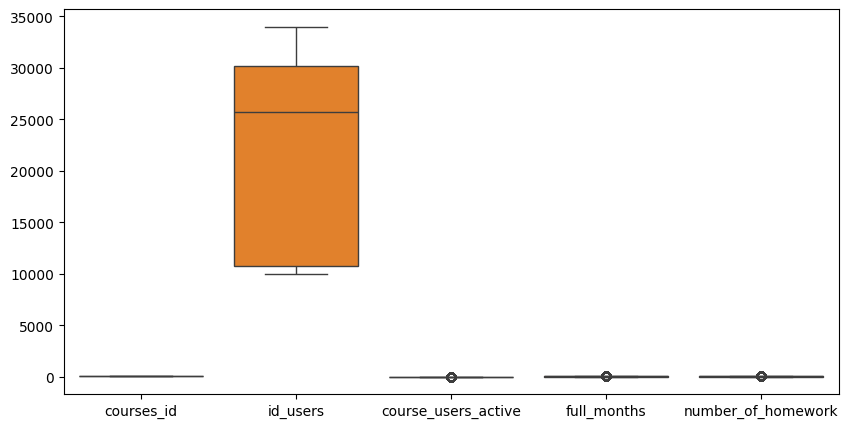

In [16]:
# Использовал функцию boxplot для визуализации выбросов
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_result)
plt.show()

<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">
    
- Пропуски удалены в столбцах `city_name, course_users_active, last_name_users, id_users, course_users_created_at`.
- Явные дубликаты отсутствуют.
- Поменяны типы данных в столбцах `id_users, course_users_active, course_users_created_at`
- Аномальные значения отсутствуют, медиана в большинстве столбцов равна среднему значению.
</div>

## Поделим всех учеников на волны

In [17]:
# Сделал копию датасета df_result
df = df_result.copy()

In [18]:
# Вычислил разницу в днях между датой старта курса и датой регистрации, 
# учитывая, что регистрация может быть до начала курса
df['days_diff'] = (df['course_users_created_at'] - df['courses_starts']).dt.days

In [19]:
# Исправил отрицательные значения, присваивая 0 для регистраций до начала курса
df['days_diff'] = df['days_diff'].apply(lambda x: 0 if x < 0 else x)

In [20]:
# Проверил на наличие отрицательных значений
df['days_diff'].unique()

array([  0,  35,   1,  38,   2,  18,  39,   8,  59,   6,  42,  41,  26,
        20,  40,   4,  43,  75,  73,  36,  70,  37,  65,  58,  11,  22,
        17,  64,  10,  52,  19,  44,  47,  45,  21,  33,  74,  16,  63,
        27,  46,   9,   5,  48,  71,  60,  13,  15,   3,  49,  54,  24,
        28,  93,  14,  25,   7,  12,  50,  31,  23,  34, 131,  32,  53,
        51,  72,  69,  68,  67,  29,  55,  56,  30, 132, 137,  77,  57,
        79, 130,  62,  76,  66,  89,  61])

In [21]:
# Создал функцию для определения волны
def get_wave(days_diff):
    if days_diff <= 0:
        return '0 волна'
    elif 0 < days_diff <= 7:
        return '1 волна'
    elif 7 < days_diff <= 14:
        return '2 волна'
    elif 14 < days_diff <= 21:
        return '3 волна'
    elif 21 < days_diff <= 28:
        return '4 волна'
    else:
        return '5 волна'

In [22]:
# Применил функцию к столбцу 'days_diff' и создал новый столбец 'wave'
df['wave'] = df['days_diff'].apply(get_wave)

In [23]:
# Проверил
df.head()

,courses_id,courses_name,subjects_name,subject_project,course_types_name,courses_starts,id_users,last_name_users,city_name,course_users_active,course_users_created_at,full_months,number_of_homework,days_diff,wave
0,101,"Курс ""Кульный"" по итоговому сочинению 2к24 для...",Русский,ЕГЭ,Спецкурс,2024-11-04,10001,Markova,Самара,1,2024-11-03 14:43:47,22,17,0,0 волна
1,19,Годовой 2к25 стандарт,Русский,ЕГЭ,Годовой,2024-09-21,10002,Коваленко,Москва,0,2024-07-25 18:07:04,5,4,0,0 волна
2,35,Крепкий орешек,Химия,ЕГЭ,Спецкурс,2024-06-21,10005,Гусев,Белгород,1,2024-07-26 05:38:41,2,2,35,5 волна
3,23,Годовой 2К25 стандарт с Машей,Математика,ЕГЭ,Годовой,2024-09-20,10011,Ищенко,Анива,1,2024-09-10 09:14:04,11,10,0,0 волна
4,40,НЕдетский курс,Обществознание,ЕГЭ,Спецкурс,2024-08-04,10012,Вахрушева,Ижевск,1,2024-08-05 12:14:09,19,17,1,1 волна


# Шаг №3: Создание дашборда в DataLens

## ссылка на дашборд: <https://datalens.yandex/wly9uxy6r05ki>

# Шаг №4:
## Общий вывод:
<div style="color: #000000; border-left: 3px solid #DCDCDC; border-right: 3px solid #DCDCDC; margin-left: 20px; padding-left: 10px">
    
1. Ограниченный период доступа: "Большинство студентов имеют 1 открытый месяц." Это говорит о том, что у большинства студентов доступ к материалам ограничен одним месяцем, что создает определенные ограничения для обучения.

2. Высокий процент продления: "Процент продления - 90%." Это очень хороший показатель, свидетельствующий о высокой удовлетворенности студентов предоставляемым контентом и сервисом, а также о их готовности продолжать обучение.

3. Популярный курс: "Больше всего покупают курс Годовой 2к25 стандарт - 2990 студентов на курсе." Курс "Годовой 2к25 стандарт" является наиболее востребованным. Вероятно, он предлагает наилучшее сочетание цены, качества и объема предоставляемых материалов.

4. Популярный предмет: "Самый высоко посещаемый предмет - обществознание - 1735 студентов." Обществознание является наиболее популярным предметом среди студентов. Это может указывать на высокий спрос на этот предмет для подготовки к ЕГЭ.

5. Ориентация на ЕГЭ: "В основном студенты готовятся к ЕГЭ." Подтверждает основной фокус студентов на подготовке к Единому государственному экзамену.

6. Покупка нескольких курсов: "В среднем студенты покупают 9-10 курсов для подготовки." Студенты проявляют высокую потребность в комплексной подготовке и приобретают несколько курсов, что говорит о готовности инвестировать в образование.

## Рекомендации:

### Расширение доступа:
- Тестирование: Рассмотреть возможность тестирования более длительных периодов доступа (например, 3 месяца, 6 месяцев) для части пользователей. Это может повысить общую удовлетворенность и дать студентам больше времени для изучения материала.
- Гибкие тарифы: Предложить гибкие тарифные планы с разной продолжительностью доступа и стоимостью, чтобы удовлетворить различные потребности студентов.

### Развитие популярного курса:
- Усиление контента: Инвестировать в улучшение контента и дополнительных материалов для курса "Годовой 2к25 стандарт".
- Кросс-продажи: Предлагать дополнительные курсы или материалы студентам, уже купившим "Годовой 2к25 стандарт".

### Развитие популярного предмета:
- Углубленный контент: Разработать более углубленный контент и дополнительные материалы по обществознанию, учитывая его популярность.
- Создание пакетов: Создать пакеты курсов по обществознанию, включающие разные уровни сложности и темы.

### Стимулирование комплексных покупок:
- Пакетные предложения: Предлагать скидки на пакеты курсов, чтобы стимулировать студентов покупать больше курсов.
- Персонализированные рекомендации: Разработать систему персонализированных рекомендаций, чтобы помочь студентам выбирать подходящие курсы для их подготовки к ЕГЭ.

### Маркетинговая стратегия:
- Фокус на ЕГЭ: Подчеркивать в маркетинговых материалах, что курсы ориентированы на подготовку к ЕГЭ.
- Демонстрация преимуществ: Акцентировать внимание на высоком проценте продления и количестве покупаемых курсов, чтобы привлечь новых студентов.

### Отслеживание результатов:
- Мониторинг показателей: Внедрить систему мониторинга показателей, включая процент продления, популярность курсов и предметов, чтобы отслеживать эффективность принятых мер и корректировать стратегию.
</div>